#  Author

**Student Name**: Sparsh.      

**Student ID**: 230440319

# 2 Problem formulation

 We need to build a machine learning pipeline using given MlEnd Yummy dataset that takes as an input a photo of a dish that has either Cuisine american and italian and predicts whether the picture is american or italian dish .

 MLEnd Yummy Dataset has 3250 samples and 12 attributes.

 - FileName(image)
 - Diet
 - Cuisine_org
 - Cuisine
 - Dish_name
 - Home_or_restaurant
 - Ingredients
 - Healthiness_rating
 - Healthiness_rating_int
 - Likeness
 - Likeness_int
 - Benchmark_A

In [3]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.7 MB/s eta 0:00:00


In [5]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


# 3 Machine Learning Pipeline

Pipeline Stages:

Step 1: Data Loading or Collection:

-  Pipeline start with downloading the data from Mlend yummy dataset and importing all necessary libraries

- Extract data from the csv file and load it to the dataframe.

Step 2: Encoding italian and american to 0 and 1

- Mapped the cuisine categorical data to numerical data italian 0 and american 1 so that it can be used as target variable Y encoded for traing and testing my machine learning model

Step 3: Data preprocessing

- I  created two function make_it_square and resize image to make all image of same size



Step 4 : Splitting Data based on Benchmark_A

- we are provided a separate column Benchmark_A which has Train and test division.Our goal is to split the data into train and test based on this column.

Step 5 : Feature Extraction

- Extracted  3 different feature from images .Basically this step is used to reduce the dimensionality of image and will explain more in Feature extraction section.

Step 7 : Model training and prediction

- After normalising the image we can apply diffrent machine learing algorithm like Svm , Random forest and k nearest neighbor to identinfy the image whether it is italian or american.

## 4 Transformation stage

Basic goal of this stage is to reduce the image dimenstionality as while processesing raw image it will be very difficult to process the image with several features in it so we will be extracting three feature here by defining two finction def get_yellow_component and and def GMLC_features.

- The first function get_yellow_component is used to get the amount of yellow colur in the image.basically we will disting images based on yellow colur in it.

- The second function GMLC_features is used to get the texture feature from grayscale image considering the specific distance and angle.

## 5 Modelling

I have used several machine learning model like Linear support vector classifier ,Random forest classifier, Logistic regression,K nearest neighbour for image classification.I have applied these serveral model in order to get variety in models as every model have their own strength and weakness so by analysing all models we can conclude to choose a perfect model .

Perfect Models used in our case is :

- Linear Support vector classifier

-- The Purpose of choosing this model is because it is considedred to be best when there is binary classification and in our model we are choosing whether the image is itallian or american.

-- It does not suffer with model overfitting and performs best in high dimenstion feature space and in our case we are using Images which has large dimention.Also it handle more complex problem


## 6 Methodology

In our case we are given a column named Benchmark_A which is basically a divion of test and train in all records so i have used this column to split between test and train dataset.

Model performance in our case is assesssed by accuracy and confusion matrix .

- Accuracy is basically no of correct prediction divided by total number of prediction.I calculated accuracy of my all four ml models and found that LinearSvc gives best accuracy in training and testing dataset.

- Confusion matrix give detailed analysis of model's prediction.

It has total 4 component
- True Positive
- True Negative
- False Positive
- False negative

In our case confusion matrix is as follow:

- 63% of the instances that were actually Italian were correctly classified as Italian (TP).
- 52% of the instances that were actually American were incorrectly classified as Italian (FP).
- 37% of the instances that were actually Italian were incorrectly classified as American (FN).
- 48% of the instances that were actually American were correctly classified as American (TN).


Accuracy of our model is (TP + TN) / (TP + TN + FP + FN)=0.55
this basically means it correctly classified 55% of instance

## 7 Dataset

The imput data has raw image and attributes like dish_name,ingredient,Benchmark_A.

Below are the preprocessing and feature extraction step.








In [6]:
dir = download_yummy(save_to='/content/drive/MyDrive/Data/MLEnd')
dir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [7]:
os.listdir(dir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [8]:
import pandas as pd


dataset_path = "./drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv"


df = pd.read_csv(dataset_path)




In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# loaded the dataset into the 'df' DataFrame
df = pd.read_csv(dataset_path)

# Filter only 'italian' and 'american' values in the 'Cuisine' column
df = df[df['Cuisine'].isin(['italian', 'american'])]


#Encoded italian to 0 and american to 1
Cuisine_mapping = {'italian': 0, 'american': 1}
df['Y_encoded'] = df['Cuisine'].map(Cuisine_mapping)

#Splitted data based on Benchmark_A column

Traindf = df[df['Benchmark_A'] == 'Train']
Testdf = df[df['Benchmark_A'] == 'Test']

# Extracted the required columns for TrainSet
TrainSet = {
    'X_paths': Traindf['filename'],  # Assuming 'filename' is the column containing paths
    'Y': np.array(Traindf['Cuisine']),
    'Y_encoded': np.array(Traindf['Y_encoded']),

}

# Extracted the required columns for TestSet
TestSet = {
    'X_paths': Testdf['filename'],  # Assuming 'filename' is the column containing paths
    'Y': np.array(Testdf['Cuisine']),
    'Y_encoded': np.array(Testdf['Y_encoded']),

}



In [36]:
# Counting italian and american dishes

italian_tt= (Testdf['Cuisine']=='italian').sum()
american_tt = (Testdf['Cuisine']=='american').sum()

italian_t= (Traindf['Cuisine']=='italian').sum()
american_t= (Traindf['Cuisine']=='american').sum()

print(italian_tt, american_tt)
print(italian_t, american_t)

78 77
205 175


In [11]:
TrainSet['Y']

array(['italian', 'italian', 'american', 'american', 'italian', 'italian',
       'american', 'american', 'italian', 'american', 'american',
       'italian', 'italian', 'american', 'american', 'italian', 'italian',
       'american', 'italian', 'italian', 'italian', 'american',
       'american', 'american', 'american', 'italian', 'american',
       'italian', 'italian', 'italian', 'italian', 'italian', 'american',
       'american', 'american', 'italian', 'italian', 'italian', 'italian',
       'american', 'american', 'italian', 'american', 'american',
       'american', 'italian', 'italian', 'italian', 'american',
       'american', 'american', 'italian', 'italian', 'american',
       'italian', 'american', 'american', 'american', 'italian',
       'italian', 'italian', 'italian', 'italian', 'italian', 'italian',
       'italian', 'italian', 'italian', 'italian', 'american', 'italian',
       'italian', 'italian', 'italian', 'italian', 'italian', 'italian',
       'american', 'itali

In [12]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [13]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [37]:
#Setting the path of images and encode column

X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

In [38]:
# Resizing the image to get same size

def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [17]:
base_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/'

X_train = []
for k, file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k, len(X_train_paths), L=50, color='blue')
    try:
        I = plt.imread(os.path.join(base_path, file))
        I = make_it_square(I, pad=0)
        I = resize_img(I, size=[200, 200])
        X_train.append(I)
    except FileNotFoundError:
        print(f"File not found: {file}")

X_test = []
for k, file in enumerate(X_test_paths):
    sp.utils.ProgBar_JL(k, len(X_test_paths), L=50, color='blue')
    try:
        I = plt.imread(os.path.join(base_path, file))
        I = make_it_square(I, pad=0)
        I = resize_img(I, size=[200, 200])
        X_test.append(I)
    except FileNotFoundError:
        print(f"File not found: {file}")

X_train = np.array(X_train)
X_test = np.array(X_test)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|380\380|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|155\155|
Done!
X_train shape: (380, 200, 200, 3)
X_test shape: (155, 200, 200, 3)


italian


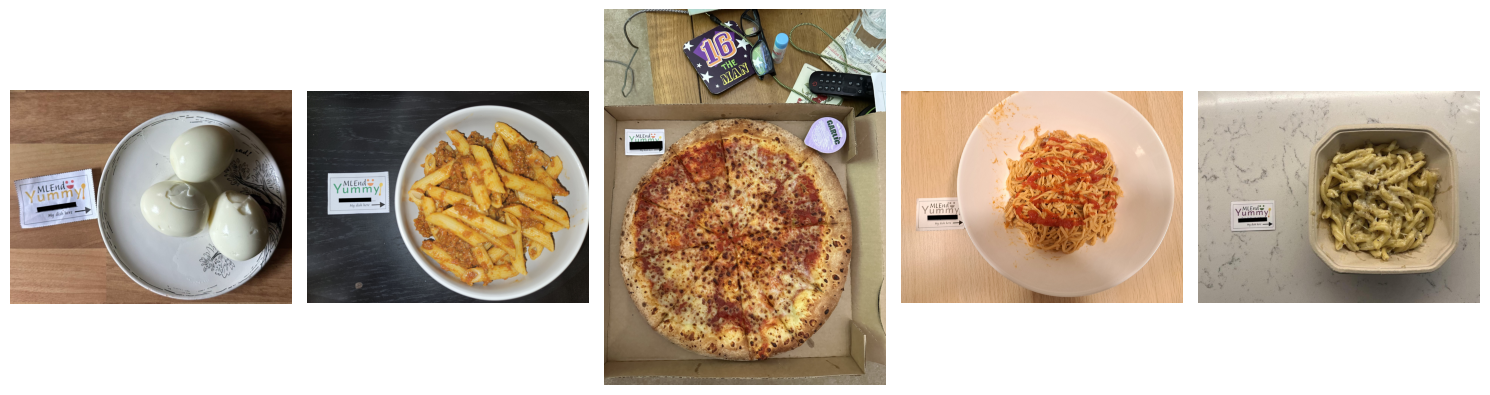

american


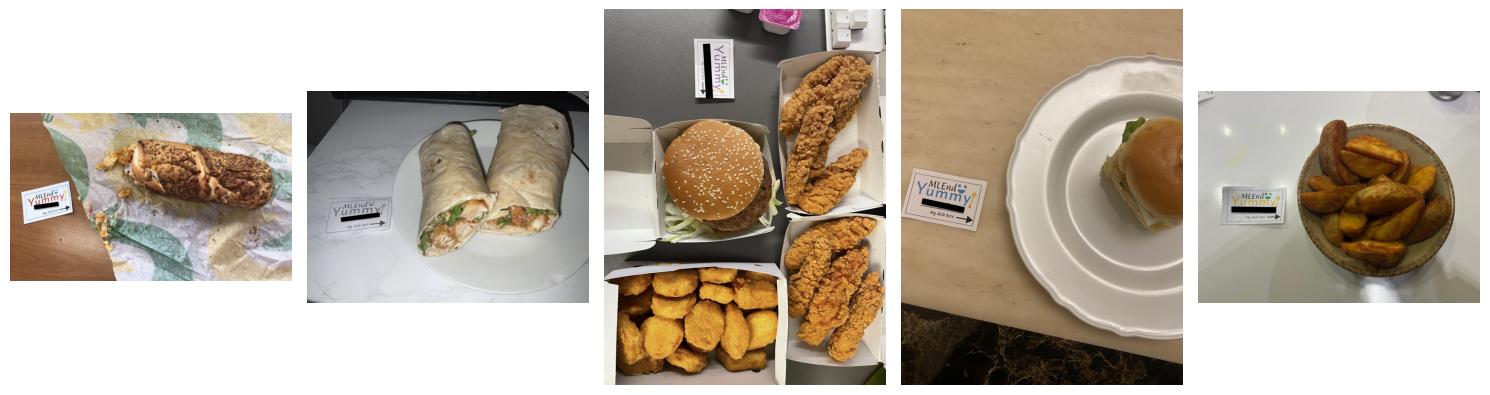

In [18]:
#Given Csv files does not have exact path of image it has only file name so extracting it and setting it to base_path

import os

# Directory path
base_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/'

italian = np.array(X_train_paths)[Y_train == 0]
american = np.array(X_train_paths)[Y_train == 1]

print('italian')
plt.figure(figsize=(15, 5))
for k, file in enumerate(italian[:5]):
    try:
        full_path = os.path.join(base_path, file)
        I = plt.imread(full_path)
        plt.subplot(1, 5, k + 1)
        plt.imshow(I)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {file}")

plt.tight_layout()
plt.show()

print('american')
plt.figure(figsize=(15, 5))
for k, file in enumerate(american[:5]):
    try:
        full_path = os.path.join(base_path, file)
        I = plt.imread(full_path)
        plt.subplot(1, 5, k + 1)
        plt.imshow(I)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {file}")

plt.tight_layout()
plt.show()


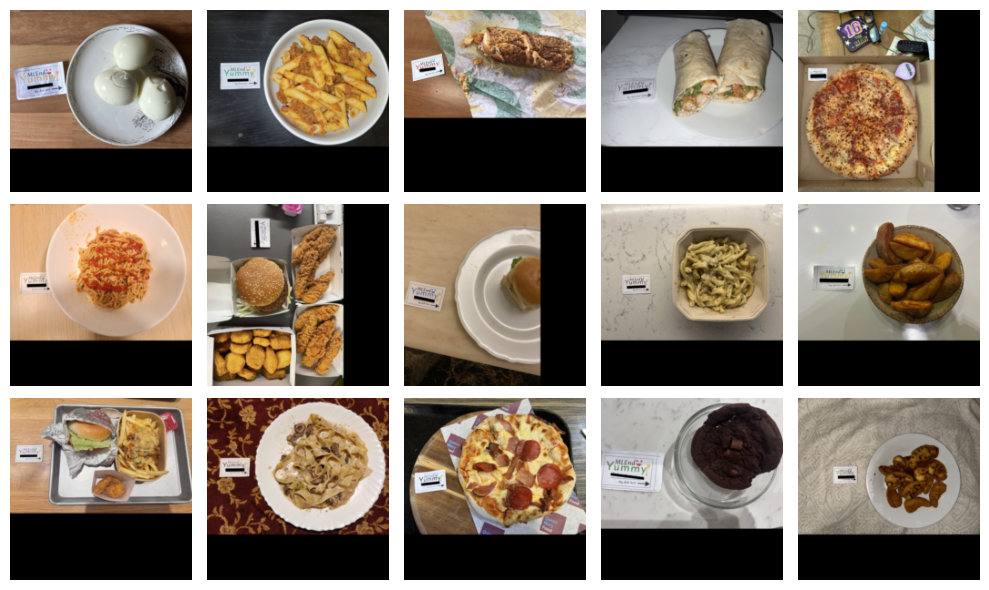

In [40]:
#After resize
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [19]:
# In this step we are extracting three image feature by defing function like  get_yellow_component and GMLC_features(I)
# Also defining function for confusion matrix

from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['italian','american']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [20]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [21]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((380, 3), (155, 3))

In [22]:
#Below step is performed for normalisation it is needed as we need to standardise the data
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

## Result

- Overview of Experiment

Experiment involve training and testing of 4 machine learning model LinearSvc,Random forest,logistic regression and K nearest neighbour .

Used Accuracy and confusion matrix for Evaluating the result.


Results are :
* 		Linear Support Vector Classifier (LinearSVC):
    * Training Accuracy: 0.607
    * Test Accuracy: 0.554
    * The LinearSVC model demonstrated moderate performance on both training and test sets.
* 		Random Forest Classifier:
    * Training Accuracy: 0.663
    * Test Accuracy: 0.49
    * The Random Forest model achieved slightly lower accuracy compared to LinearSVC.
* 		Logistic Regression:
    * Training Accuracy: 0.613
    * Test Accuracy: 0.55
    * Similar to LinearSVC, Logistic Regression showed comparable performance.
* 		k-Nearest Neighbors (KNN):
    * Training Accuracy: 0.76
    * Test Accuracy: 0.47
    * KNN, with k=3, demonstrated higher training accuracy but lower test accuracy.


In [23]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('LinearSVC Training Accuracy:\t',train_accuracy)
print('LinearSVC Test  Accuracy:\t',test_accuracy)

LinearSVC Training Accuracy:	 0.6078947368421053
LinearSVC Test  Accuracy:	 0.5548387096774193


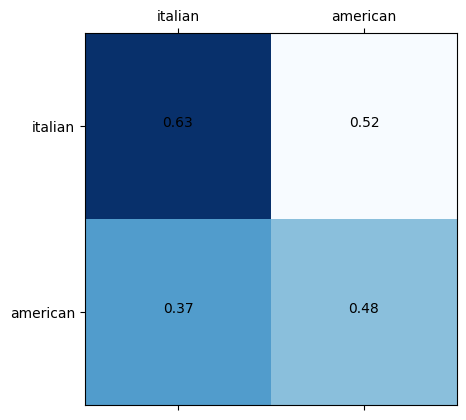

In [24]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [29]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=5,max_depth=3)
model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('RandomForestClassifier Training Accuracy:\t',train_accuracy)
print('RandomForestClassifier Test  Accuracy:\t',test_accuracy)

RandomForestClassifier Training Accuracy:	 0.6631578947368421
RandomForestClassifier Test  Accuracy:	 0.4967741935483871


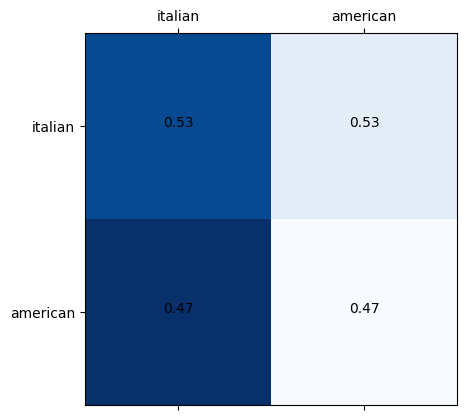

In [30]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [31]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression()

logistic_model.fit(X_train_fn, Y_train)

ytp_logistic = logistic_model.predict(X_train_fn)
ysp_logistic = logistic_model.predict(X_test_fn)

train_accuracy_logistic = np.mean(ytp_logistic == Y_train)
test_accuracy_logistic = np.mean(ysp_logistic == Y_test)

print('Logistic Regression Training Accuracy:', train_accuracy_logistic)
print('Logistic Regression Test Accuracy:', test_accuracy_logistic)


Logistic Regression Training Accuracy: 0.6131578947368421
Logistic Regression Test Accuracy: 0.5548387096774193


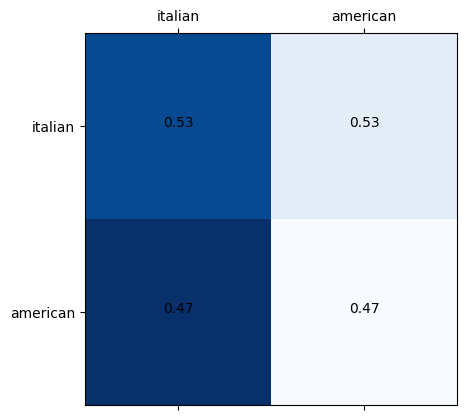

In [32]:

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp == Y_train)
test_accuracy = np.mean(ysp == Y_test)

print('KNeighborsClassifier Training Accuracy:\t', train_accuracy)
print('KNeighborsClassifier Test Accuracy:\t\t', test_accuracy)


KNeighborsClassifier Training Accuracy:	 0.7631578947368421
KNeighborsClassifier Test Accuracy:		 0.4774193548387097


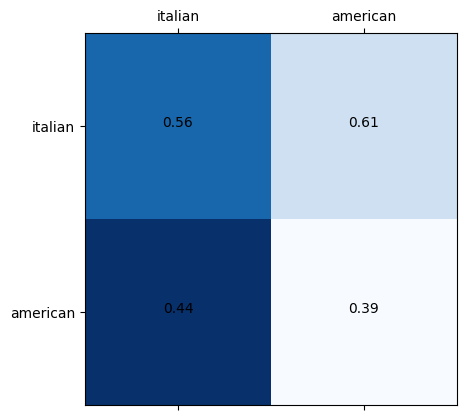

In [34]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

## 9 Conclusion


Key conclusion after applying above machine learning model are:

-    LinearSvc and Logistic regression shows same result which  shows that linear model is well suited for binary classification (italian,american).
-  Random forest did not standout on linear model shows less accuracy on testing data
-    K nearest neighbour has higher training accuracy but lower test accuracy which can be a case of overfitting

Improvements

- We can add other feature like Convolutional Neural Network (CNN) Features,HOG (Histogram of Oriented Gradients),Local Binary Patterns (LBP) related to image to get more accuarte result.
- I have tried adding some feature like histogram but it didn't suited well so i removed it from my solution
- We can also use hyperparamenter tuning to search optimal hyperparameter for each model

Future work

- We can use Deep learning architecture like convolution nueral network for image classification






